<img src="https://drive.google.com/uc?id=1SOzRTjUt7cuBJpSqoK90fcAiKBrnpUJo" width="400">
<br>
<b>
<font size="6" face="arial" color="blue">
     Grupo de Estudos em Inteligência Artificial (GEIA)
</font>
</b>
<br>
<b>
<font size="4" face="arial">
    Grupo de Estudos em Otimização em Grafos - Prof. Me. Ricardo Carubbi
</font>
</b>

Gabriela Ferreira - MBA em Ciência de Dados (Turma 8)

# Grau, Grau Médio e Distribuição de Grau


## Grau



O **grau** de um nó $i$ em um grafo é definido como o número total de conexões que ele possui com outros nós.

### Grau em Grafos Não Direcionados

Segundo Newman (2018, p.127), um grafo não direcionado com $n$ nós, o grau de um nó $i$, denotado por $k_i$, é definido pela soma das conexões usando a matriz de adjacência $A$:

$$
k_i = \sum_{j=1}^{n} A_{ij}
$$

onde:
- $A_{ij} = 1$ se existe uma aresta entre os nós $i$ e $j$, e
- $A_{ij} = 0$ caso contrário.


### Grau em Grafos Direcionados

De acordo com Barabási (2016, p.8) um grafo direcionado, distinguimos entre o **grau de entrada** e o **grau de saída**.

- **Grau de Entrada** $k_i^{\text{in}}$: o grau de entrada de um nó $i$ é o número de arestas que chegam ao nó, e é calculado como:

$$k_i^{\text{in}} = \sum_{j=1}^{n} A_{ji}$$

- **Grau de Saída** $k_i^{\text{out}}$: o grau de saída de um nó $i$ é o número de arestas que saem do nó, calculado como:

$$k_i^{\text{out}} = \sum_{j=1}^{n} A_{ij}$$




### Exemplo Prático

Para exemplificar o conceito de grau de um nó usando uma **rede de transporte aéreo**, podemos considerar o grafo onde:

- **Nó** representa um **aeroporto**.
- **Aresta** representa um **voo direto entre dois aeroportos**.

#### Grafo Não Direcionado (Conexões Bidirecionais)

Neste caso, vamos assumir que **se existe uma conexão entre dois aeroportos, o voo é bidirecional** (isto é, ida e volta).

In [ ]:
!pip install networkx

Grau de cada aeroporto no grafo não direcionado:
Aeroporto A: grau 2
Aeroporto B: grau 2
Aeroporto C: grau 3
Aeroporto D: grau 2
Aeroporto E: grau 1


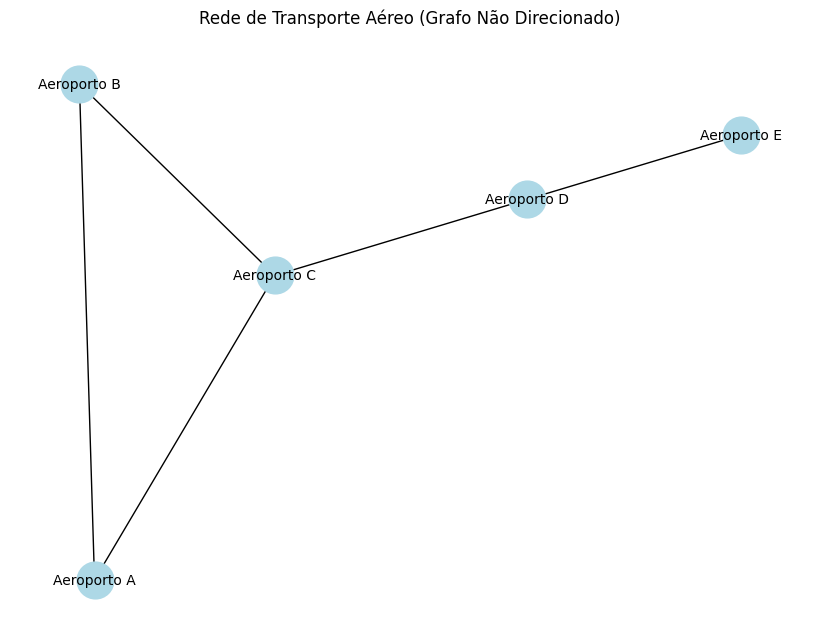

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo não direcionado (bidirecional)
G_nd = nx.Graph()

# Adicionando conexões entre aeroportos (arestas)
G_nd.add_edges_from([
    ("Aeroporto A", "Aeroporto B"),
    ("Aeroporto A", "Aeroporto C"),
    ("Aeroporto B", "Aeroporto C"),
    ("Aeroporto C", "Aeroporto D"),
    ("Aeroporto D", "Aeroporto E")
])

# Calculando o grau de cada aeroporto no grafo não direcionado
graus_nd = {nodo: grau for nodo, grau in G_nd.degree()}

print("Grau de cada aeroporto no grafo não direcionado:")
for aeroporto, grau in graus_nd.items():
    print(f"{aeroporto}: grau {grau}")

# Visualização do grafo não direcionado
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_nd)
nx.draw(G_nd, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10)
plt.title("Rede de Transporte Aéreo (Grafo Não Direcionado)")
plt.show()

#### Grafo Direcionado (Conexões Unidirecionais)

Neste exemplo, vamos considerar que cada conexão é **unidirecional**, ou seja, **um voo pode existir de "Aeroporto A" para "Aeroporto B" sem necessariamente existir um voo de volta**.




Grau de entrada e saída de cada aeroporto no grafo direcionado:
Aeroporto A: grau de entrada 1, grau de saída 2
Aeroporto B: grau de entrada 1, grau de saída 1
Aeroporto C: grau de entrada 2, grau de saída 1
Aeroporto D: grau de entrada 1, grau de saída 1
Aeroporto E: grau de entrada 1, grau de saída 1


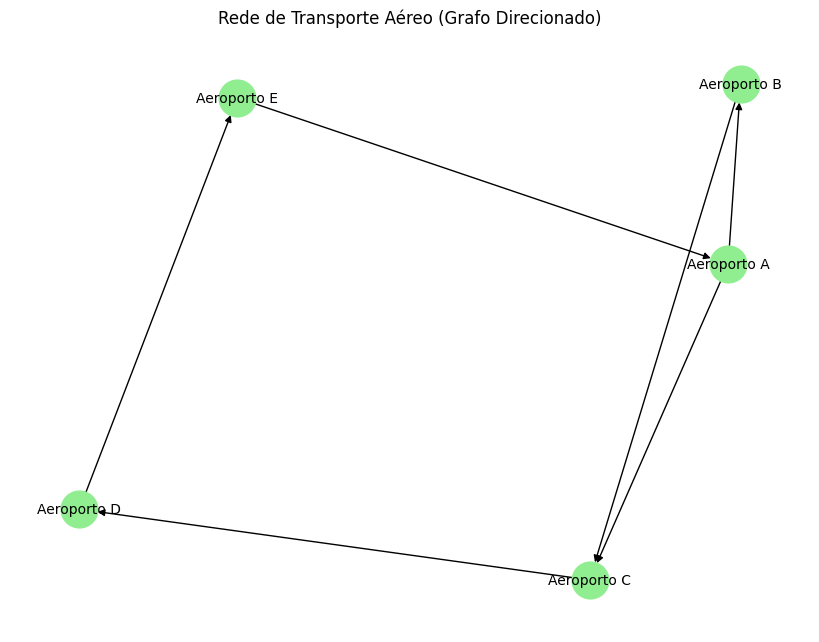

In [ ]:
# Criando um grafo direcionado (unidirecional)
G_d = nx.DiGraph()

# Adicionando conexões unidirecionais entre aeroportos (arestas direcionadas)
G_d.add_edges_from([
    ("Aeroporto A", "Aeroporto B"),
    ("Aeroporto A", "Aeroporto C"),
    ("Aeroporto B", "Aeroporto C"),
    ("Aeroporto C", "Aeroporto D"),
    ("Aeroporto D", "Aeroporto E"),
    ("Aeroporto E", "Aeroporto A")  # Exemplo de uma conexão que fecha um ciclo
])

# Calculando o grau de entrada e de saída de cada aeroporto no grafo direcionado
graus_entrada = {nodo: grau for nodo, grau in G_d.in_degree()}
graus_saida = {nodo: grau for nodo, grau in G_d.out_degree()}

print("\nGrau de entrada e saída de cada aeroporto no grafo direcionado:")
for aeroporto in G_d.nodes():
    print(f"{aeroporto}: grau de entrada {graus_entrada[aeroporto]}, grau de saída {graus_saida[aeroporto]}")

# Visualização do grafo direcionado
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_d)
nx.draw(G_d, pos, with_labels=True, node_color="lightgreen", node_size=700, font_size=10, arrows=True)
plt.title("Rede de Transporte Aéreo (Grafo Direcionado)")
plt.show()


## Grau Médio

O **grau médio** é calculado somando todos os graus e dividindo pelo número total de nós $n$ (NEWMAN, 2018; BARABÁSI, 2016), conforme apresentado na fórmula:

$$
\langle k \rangle = \frac{1}{n} \sum_{i=1}^{n} k_i
$$

  onde:
  - $\langle k \rangle$  representa o **grau médio** da rede, que é a média do número de conexões (arestas) por nó.
  - $n$ é o **número total de nós** (ou vértices) na rede.
  - $ k_i $ é o grau do $ i $-ésimo nó (ou seja, o número de conexões que ele possui) .



### Grau Médio em Grafos Não Direcionados

Em redes não direcionadas, o grau médio pode ser simplificado para :

$$
\langle k \rangle = \frac{2m}{n}
$$

onde:
- $m$ é o **número total de arestas** na rede.
- $n$ é o **número total de nós** (ou vértices) na rede.


### Grau Médio em Grafos Direcionados

Em grafos direcionados, calculamos o **grau médio** separadamente para o **grau de entrada** e o **grau de saída**.

Para uma rede com $n$ nós e $L$ arestas:

- **Grau médio de entrada** $\langle k^{\text{in}} \rangle$:
  $$
  \langle k^{\text{in}} \rangle = \frac{1}{n} \sum_{i=1}^{n} k_i^{\text{in}}
  $$

- **Grau médio de saída** $\langle k^{\text{out}} \rangle$:
  $$
  \langle k^{\text{out}} \rangle = \frac{1}{n} \sum_{i=1}^{n} k_i^{\text{out}}
  $$

onde:
- $k_i^{\text{in}}$ é o número de arestas que entram no nó $i$.
- $k_i^{\text{out}}$ é o número de arestas que saem do nó $i$.
- $n$ é o número total de nós.

#### Grau Médio Total
O grau médio de entrada é igual ao grau médio de saída:

$$
\langle k^{\text{in}} \rangle = \langle k^{\text{out}} \rangle = \frac{L}{n}
$$

onde $L$ é o número total de arestas.

### Exemplo Prático


#### Grafo Não Direcionado (Conexões Bidirecionais)

Isso pode representar:
- Redes de transporte aéreo entre grandes hubs de aeroportos, onde as conexões são regulares e de alta frequência, permitindo que as pessoas possam viajar para um destino e retornar no mesmo dia.

Grafo Não Direcionado (Bidirecional):
Número de aeroportos: 5
Número de conexões: 5
Grau médio: 2.00



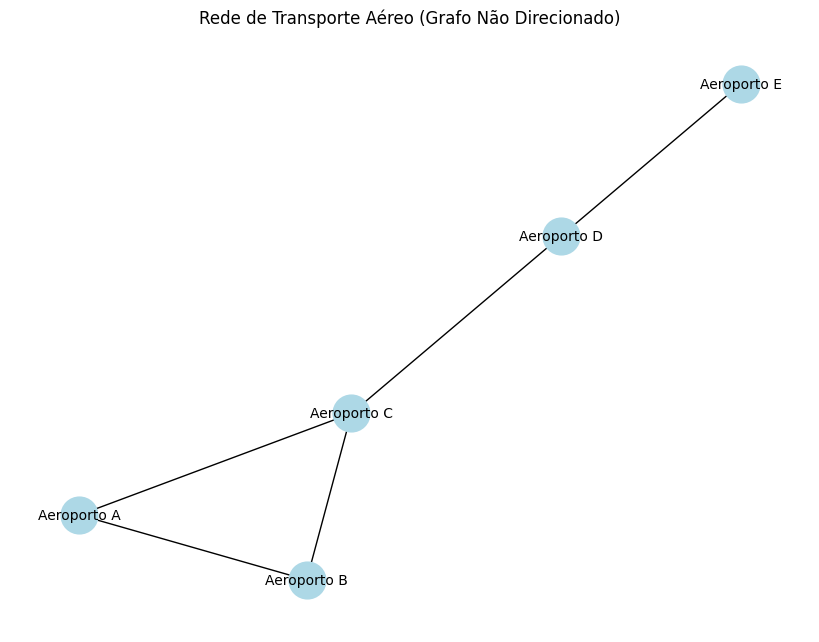

In [ ]:
import networkx as nx

# Criando um grafo não direcionado (bidirecional)
G_nd = nx.Graph()
G_nd.add_edges_from([
    ("Aeroporto A", "Aeroporto B"),
    ("Aeroporto A", "Aeroporto C"),
    ("Aeroporto B", "Aeroporto C"),
    ("Aeroporto C", "Aeroporto D"),
    ("Aeroporto D", "Aeroporto E")
])

# Cálculo do grau médio
n_nd = len(G_nd.nodes)
L_nd = len(G_nd.edges)
grau_medio_nd = (2 * L_nd) / n_nd

print("Grafo Não Direcionado (Bidirecional):")
print(f"Número de aeroportos: {n_nd}")
print(f"Número de conexões: {L_nd}")
print(f"Grau médio: {grau_medio_nd:.2f}\n")

# Visualização do grafo não direcionado (bidirecional)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_nd)
nx.draw(G_nd, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10)
plt.title("Rede de Transporte Aéreo (Grafo Não Direcionado)")
plt.show()

#### Grafo Direcionado (Conexões Unidirecionais)

 Isso pode representar:
 - Voos fretados de ida para uma cidade turística, com o retorno ocorrendo em dias específicos.
 - Um circuito de voos que visita várias cidades em sequência, como alguns voos regionais que fazem paradas em várias cidades e retornam ao ponto de partida no final.

Grafo Direcionado (Unidirecional):
Número de aeroportos: 5
Número de conexões: 6
Grau médio de entrada: 1.20
Grau médio de saída: 1.20
Grau médio total: 1.20


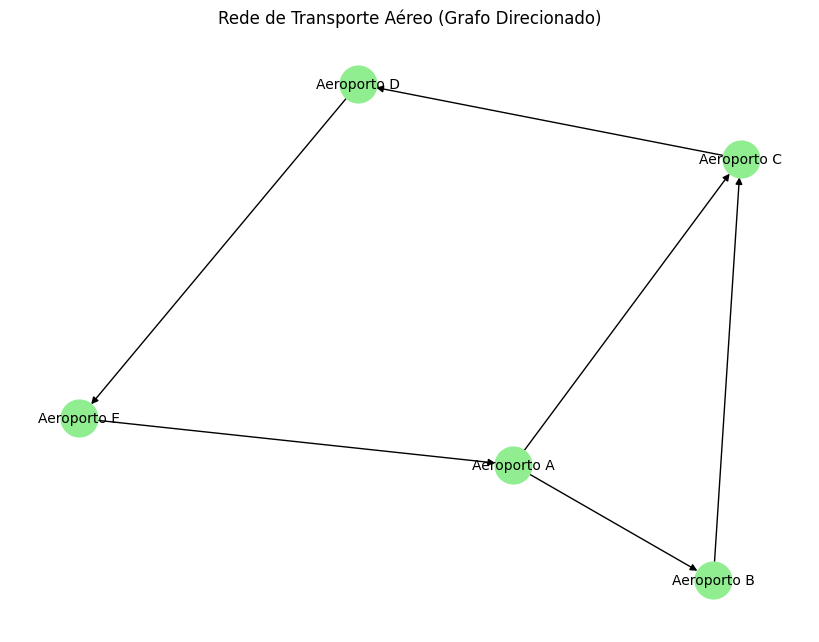

In [ ]:
# Criando um grafo direcionado (unidirecional)
G_d = nx.DiGraph()
G_d.add_edges_from([
    ("Aeroporto A", "Aeroporto B"),
    ("Aeroporto A", "Aeroporto C"),
    ("Aeroporto B", "Aeroporto C"),
    ("Aeroporto C", "Aeroporto D"),
    ("Aeroporto D", "Aeroporto E"),
    ("Aeroporto E", "Aeroporto A")  # Conexão que fecha um ciclo
])

# Cálculo do grau médio
n_d = len(G_d.nodes)
L_d = len(G_d.edges)
grau_medio_entrada = sum(dict(G_d.in_degree()).values()) / n_d
grau_medio_saida = sum(dict(G_d.out_degree()).values()) / n_d
grau_medio_total = L_d / n_d

print("Grafo Direcionado (Unidirecional):")
print(f"Número de aeroportos: {n_d}")
print(f"Número de conexões: {L_d}")
print(f"Grau médio de entrada: {grau_medio_entrada:.2f}")
print(f"Grau médio de saída: {grau_medio_saida:.2f}")
print(f"Grau médio total: {grau_medio_total:.2f}")

# Visualização do grafo direcionado (unidirecional)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_d)
nx.draw(G_d, pos, with_labels=True, node_color="lightgreen", node_size=700, font_size=10, arrows=True)
plt.title("Rede de Transporte Aéreo (Grafo Direcionado)")
plt.show()


## Distribuição de Grau

A **distribuição de grau** em uma rede mostra a probabilidade de que um nó escolhido aleatoriamente tenha um certo número de conexões ou grau (BARABÁSI, 2016, p.9).



> Representa a frequência de nós com diferentes valores de grau em uma rede.


Para um grafo com $n$ nós, a distribuição de grau é representada pela função $p_k$, onde:

- $p_k$ é a fração de nós com grau $k$.

Matematicamente, se $N_k$ é o número de nós com grau $k$, então a distribuição de grau $p_k$ é calculada como:

$$
p_k = \frac{N_k}{n}
$$

onde:
- $N_k$ é o número de nós com grau $k$,
- $n$ é o número total de nós na rede.




### Exemplo Prático


#### Grafo Não Direcionado (Conexões Bidirecionais)

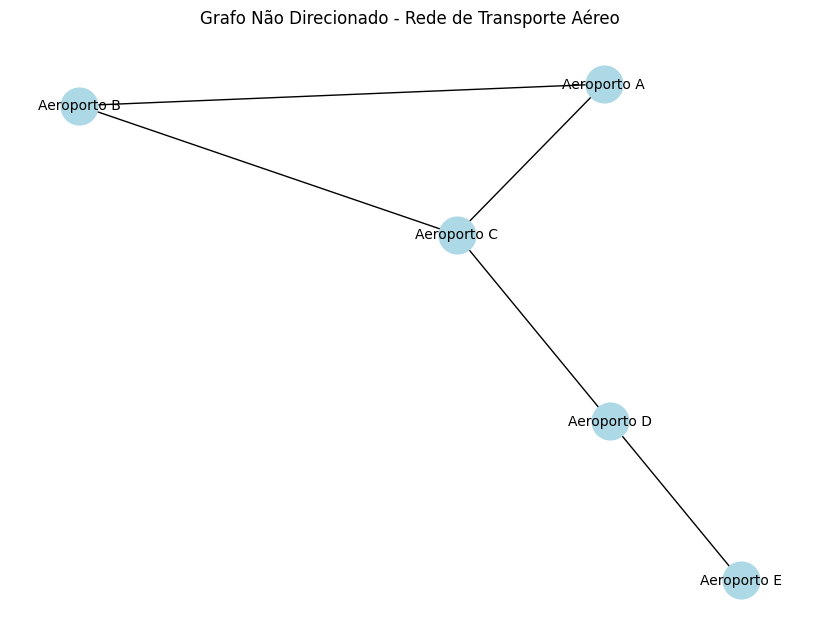

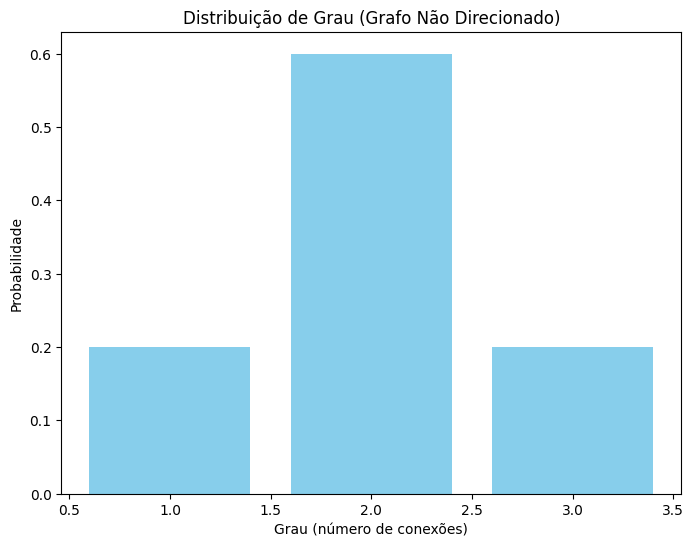

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Criando um grafo não direcionado
G_nd = nx.Graph()
G_nd.add_edges_from([
    ("Aeroporto A", "Aeroporto B"),
    ("Aeroporto A", "Aeroporto C"),
    ("Aeroporto B", "Aeroporto C"),
    ("Aeroporto C", "Aeroporto D"),
    ("Aeroporto D", "Aeroporto E"),
])

# Calculando o grau de cada aeroporto
graus_nd = [grau for _, grau in G_nd.degree()]
distribuicao_grau_nd = Counter(graus_nd)
n_total_nd = len(G_nd.nodes)

# Convertendo para probabilidades
distribuicao_grau_prob_nd = {k: v / n_total_nd for k, v in distribuicao_grau_nd.items()}

# Visualização do Grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_nd)
nx.draw(G_nd, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10)
plt.title("Grafo Não Direcionado - Rede de Transporte Aéreo")
plt.show()

# Visualização da Distribuição de Grau
plt.figure(figsize=(8, 6))
plt.bar(distribuicao_grau_prob_nd.keys(), distribuicao_grau_prob_nd.values(), color="skyblue")
plt.xlabel("Grau (número de conexões)")
plt.ylabel("Probabilidade")
plt.title("Distribuição de Grau (Grafo Não Direcionado)")
plt.show()


#### Grafo Direcionado (Conexões Bidirecionais)

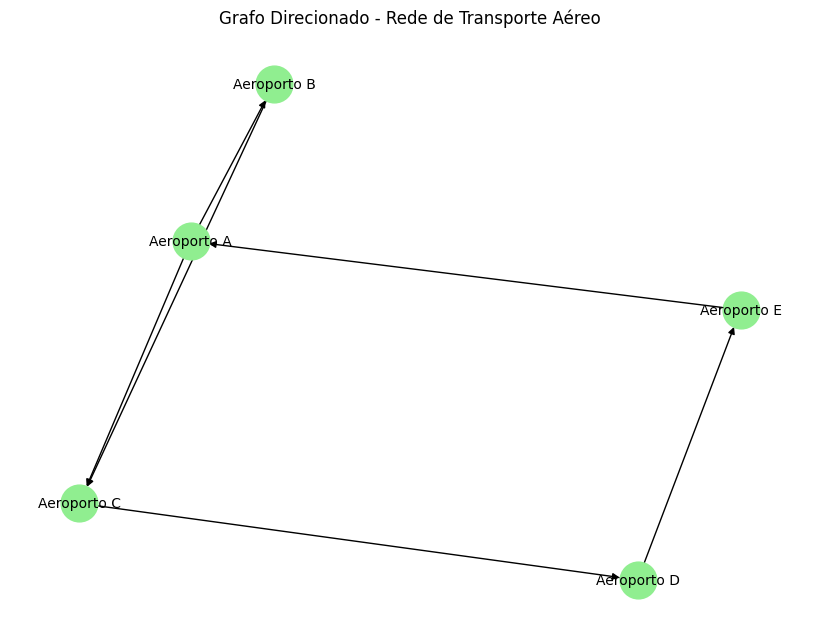

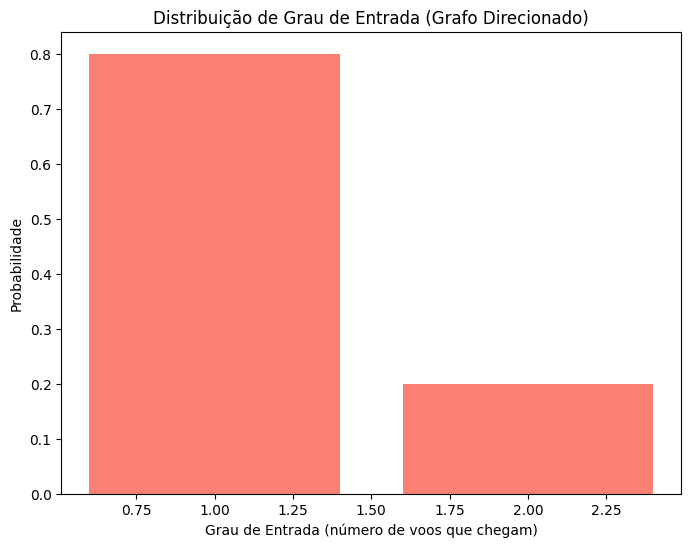

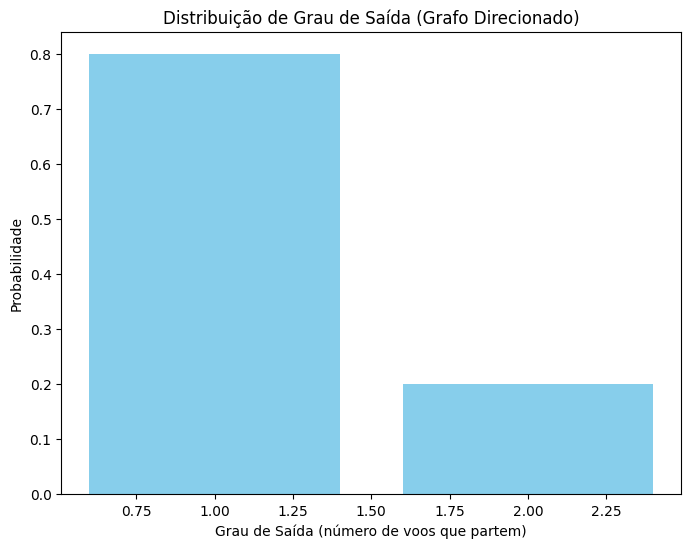

In [ ]:
# Criando um grafo direcionado
G_d = nx.DiGraph()
G_d.add_edges_from([
    ("Aeroporto A", "Aeroporto B"),
    ("Aeroporto A", "Aeroporto C"),
    ("Aeroporto B", "Aeroporto C"),
    ("Aeroporto C", "Aeroporto D"),
    ("Aeroporto D", "Aeroporto E"),
    ("Aeroporto E", "Aeroporto A")  # Exemplo de ciclo
])

# Calculando o grau de entrada e saída de cada aeroporto
graus_entrada = [grau for _, grau in G_d.in_degree()]
graus_saida = [grau for _, grau in G_d.out_degree()]

# Calculando as distribuições de grau de entrada e saída
distribuicao_grau_entrada = Counter(graus_entrada)
distribuicao_grau_saida = Counter(graus_saida)
n_total_d = len(G_d.nodes)

# Convertendo para probabilidades
distribuicao_grau_entrada_prob = {k: v / n_total_d for k, v in distribuicao_grau_entrada.items()}
distribuicao_grau_saida_prob = {k: v / n_total_d for k, v in distribuicao_grau_saida.items()}

# Visualização do Grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_d)
nx.draw(G_d, pos, with_labels=True, node_color="lightgreen", node_size=700, font_size=10, arrows=True)
plt.title("Grafo Direcionado - Rede de Transporte Aéreo")
plt.show()

# Visualização da Distribuição de Grau de Entrada
plt.figure(figsize=(8, 6))
plt.bar(distribuicao_grau_entrada_prob.keys(), distribuicao_grau_entrada_prob.values(), color="salmon")
plt.xlabel("Grau de Entrada (número de voos que chegam)")
plt.ylabel("Probabilidade")
plt.title("Distribuição de Grau de Entrada (Grafo Direcionado)")
plt.show()

# Visualização da Distribuição de Grau de Saída
plt.figure(figsize=(8, 6))
plt.bar(distribuicao_grau_saida_prob.keys(), distribuicao_grau_saida_prob.values(), color="skyblue")
plt.xlabel("Grau de Saída (número de voos que partem)")
plt.ylabel("Probabilidade")
plt.title("Distribuição de Grau de Saída (Grafo Direcionado)")
plt.show()


Em grafos não direcionados, cada nó tem apenas um grau (número de conexões). Em grafos direcionados, cada nó tem um grau de entrada e um grau de saída, o que significa que a distribuição de grau é mais complexa.

# Rede Real: Grafo de Transporte Aéreo

### Importação do Arquivo de Rotas

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving routes.dat to routes.dat


#### Criando o Grafo de Rede de Transporte Aéreo

In [ ]:
import csv
import networkx as nx

# Criar um grafo direcionado vazio
graph = nx.DiGraph()

# Dicionário para mapear IDs dos aeroportos para os nós do grafo
airport_id_map = {}

# Carregar os dados do arquivo `routes.dat`
with open("routes.dat", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        # Os índices do arquivo CSV, conforme o formato de dados do OpenFlights
        source_airport_id = row[3]
        destination_airport_id = row[5]

        # Verificar se os IDs dos aeroportos são válidos (diferentes de "\\N")
        if source_airport_id == "\\N" or destination_airport_id == "\\N":
            continue

        # Adicionar o aeroporto de origem ao grafo, se ainda não estiver presente
        if source_airport_id not in airport_id_map:
            airport_id_map[source_airport_id] = source_airport_id
            graph.add_node(source_airport_id)

        # Adicionar o aeroporto de destino ao grafo, se ainda não estiver presente
        if destination_airport_id not in airport_id_map:
            airport_id_map[destination_airport_id] = destination_airport_id
            graph.add_node(destination_airport_id)

        # Adicionar uma aresta entre o aeroporto de origem e destino
        graph.add_edge(source_airport_id, destination_airport_id)

# Salvar a rede em um formato apropriado para NetworkX (como GraphML ou GML)
nx.write_gml(graph, "rede_aerea.gml")
print("Rede de transporte aéreo carregada e salva com sucesso.")


Rede de transporte aéreo carregada e salva com sucesso.


## Cálculo Grau de Entrada e Saída

In [ ]:
# Calcular o grau de entrada e o grau de saída para cada aeroporto
graus_aeroportos = []

for node in graph.nodes:
    grau_entrada = graph.in_degree(node)
    grau_saida = graph.out_degree(node)
    graus_aeroportos.append((node, grau_entrada, grau_saida))

# Ordenar a lista pelo grau de entrada e depois pelo grau de saída, do maior para o menor
graus_aeroportos_ordenados = sorted(graus_aeroportos, key=lambda x: (x[1], x[2]), reverse=True)

# Exibir os resultados ordenados
print("\nGrau de entrada e saída de cada aeroporto (ordenado do maior para o menor):")
for aeroporto, grau_entrada, grau_saida in graus_aeroportos_ordenados:
    print(f"Aeroporto {aeroporto}: Grau de entrada = {grau_entrada}, Grau de saída = {grau_saida}")


Grau de entrada e saída de cada aeroporto (ordenado do maior para o menor):
Aeroporto 340: Grau de entrada = 238, Grau de saída = 239
Aeroporto 1382: Grau de entrada = 233, Grau de saída = 237
Aeroporto 580: Grau de entrada = 231, Grau de saída = 232
Aeroporto 1701: Grau de entrada = 228, Grau de saída = 225
Aeroporto 3682: Grau de entrada = 216, Grau de saída = 217
Aeroporto 3364: Grau de entrada = 206, Grau de saída = 206
Aeroporto 3830: Grau de entrada = 203, Grau de saída = 206
Aeroporto 346: Grau de entrada = 189, Grau de saída = 191
Aeroporto 4029: Grau de entrada = 188, Grau de saída = 187
Aeroporto 3670: Grau de entrada = 185, Grau de saída = 187
Aeroporto 2188: Grau de entrada = 180, Grau de saída = 186
Aeroporto 507: Grau de entrada = 170, Grau de saída = 170
Aeroporto 3751: Grau de entrada = 168, Grau de saída = 169
Aeroporto 3550: Grau de entrada = 168, Grau de saída = 169
Aeroporto 502: Grau de entrada = 165, Grau de saída = 165
Aeroporto 1218: Grau de entrada = 163, Grau

## Grau Médio de Entrada e Saída

In [ ]:
# Calcular o grau médio de entrada e de saída
n_total = graph.number_of_nodes()
total_grau_entrada = sum(dict(graph.in_degree()).values())
total_grau_saida = sum(dict(graph.out_degree()).values())
grau_medio_entrada = total_grau_entrada / n_total
grau_medio_saida = total_grau_saida / n_total

print("Grau médio de entrada:", grau_medio_entrada)
print("Grau médio de saída:", grau_medio_saida)

Grau médio de entrada: 11.193393393393393
Grau médio de saída: 11.193393393393393


## Distribuição de Grau

In [ ]:
import networkx as nx
from collections import Counter

# Cálculo da distribuição do grau de entrada
graus_entrada = [grau for _, grau in graph.in_degree()]
distribuicao_grau_entrada = Counter(graus_entrada)
n_total = graph.number_of_nodes()

# Convertendo para probabilidades
distribuicao_grau_entrada_prob = {k: v / n_total for k, v in distribuicao_grau_entrada.items()}
print("Distribuição de Grau de Entrada:")
for grau, prob in distribuicao_grau_entrada_prob.items():
    print(f"Grau de entrada {grau}: {prob:.4f}")

Distribuição de Grau de Entrada:
Grau de entrada 18: 0.0078
Grau de entrada 21: 0.0051
Grau de entrada 7: 0.0237
Grau de entrada 16: 0.0039
Grau de entrada 14: 0.0063
Grau de entrada 52: 0.0012
Grau de entrada 188: 0.0003
Grau de entrada 3: 0.1102
Grau de entrada 9: 0.0216
Grau de entrada 10: 0.0147
Grau de entrada 39: 0.0015
Grau de entrada 112: 0.0003
Grau de entrada 66: 0.0006
Grau de entrada 4: 0.0667
Grau de entrada 26: 0.0042
Grau de entrada 1: 0.2568
Grau de entrada 2: 0.1952
Grau de entrada 20: 0.0066
Grau de entrada 6: 0.0324
Grau de entrada 56: 0.0018
Grau de entrada 5: 0.0480
Grau de entrada 28: 0.0024
Grau de entrada 31: 0.0036
Grau de entrada 19: 0.0090
Grau de entrada 74: 0.0006
Grau de entrada 24: 0.0021
Grau de entrada 136: 0.0003
Grau de entrada 49: 0.0009
Grau de entrada 72: 0.0021
Grau de entrada 100: 0.0003
Grau de entrada 83: 0.0015
Grau de entrada 55: 0.0015
Grau de entrada 123: 0.0003
Grau de entrada 30: 0.0036
Grau de entrada 104: 0.0006
Grau de entrada 78: 0.00

In [ ]:
# Cálculo da distribuição do grau de saída
graus_saida = [grau for _, grau in graph.out_degree()]
distribuicao_grau_saida = Counter(graus_saida)

# Convertendo para probabilidades
distribuicao_grau_saida_prob = {k: v / n_total for k, v in distribuicao_grau_saida.items()}
print("\nDistribuição de Grau de Saída:")
for grau, prob in distribuicao_grau_saida_prob.items():
    print(f"Grau de saída {grau}: {prob:.4f}")


Distribuição de Grau de Saída:
Grau de saída 17: 0.0066
Grau de saída 21: 0.0048
Grau de saída 7: 0.0261
Grau de saída 16: 0.0051
Grau de saída 14: 0.0060
Grau de saída 51: 0.0018
Grau de saída 187: 0.0006
Grau de saída 3: 0.1081
Grau de saída 9: 0.0207
Grau de saída 10: 0.0144
Grau de saída 39: 0.0024
Grau de saída 109: 0.0006
Grau de saída 64: 0.0012
Grau de saída 4: 0.0694
Grau de saída 26: 0.0042
Grau de saída 1: 0.2556
Grau de saída 2: 0.1976
Grau de saída 20: 0.0069
Grau de saída 6: 0.0312
Grau de saída 56: 0.0012
Grau de saída 5: 0.0456
Grau de saída 15: 0.0057
Grau de saída 30: 0.0033
Grau de saída 31: 0.0027
Grau de saída 18: 0.0096
Grau de saída 8: 0.0216
Grau de saída 74: 0.0006
Grau de saída 19: 0.0066
Grau de saída 23: 0.0045
Grau de saída 137: 0.0006
Grau de saída 49: 0.0027
Grau de saída 73: 0.0012
Grau de saída 101: 0.0003
Grau de saída 80: 0.0009
Grau de saída 53: 0.0009
Grau de saída 83: 0.0006
Grau de saída 123: 0.0003
Grau de saída 104: 0.0009
Grau de saída 0: 0.00

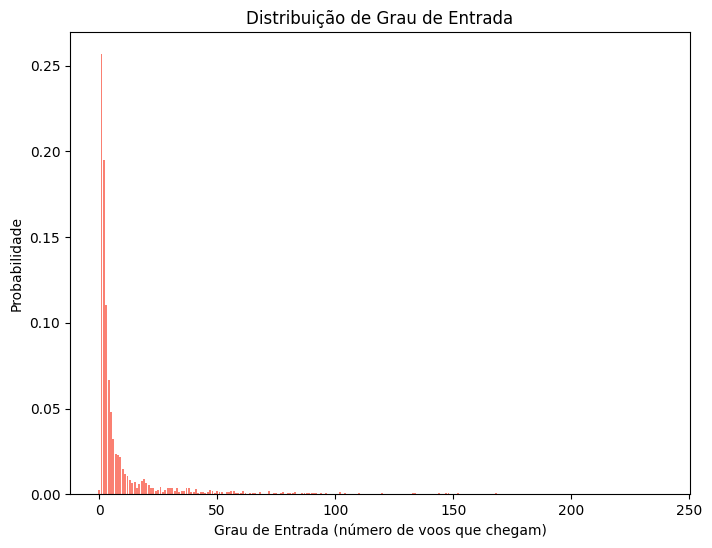

In [ ]:
import matplotlib.pyplot as plt

# Visualização da distribuição de grau de entrada
plt.figure(figsize=(8, 6))
plt.bar(distribuicao_grau_entrada_prob.keys(), distribuicao_grau_entrada_prob.values(), color="salmon")
plt.xlabel("Grau de Entrada (número de voos que chegam)")
plt.ylabel("Probabilidade")
plt.title("Distribuição de Grau de Entrada")
plt.show()



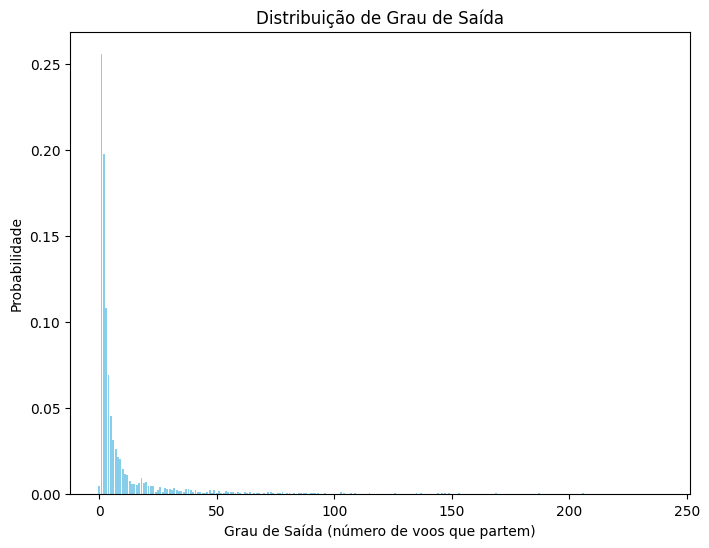

In [ ]:
# Visualização da distribuição de grau de saída
plt.figure(figsize=(8, 6))
plt.bar(distribuicao_grau_saida_prob.keys(), distribuicao_grau_saida_prob.values(), color="skyblue")
plt.xlabel("Grau de Saída (número de voos que partem)")
plt.ylabel("Probabilidade")
plt.title("Distribuição de Grau de Saída")
plt.show()

# Referências

BARABÁSI, Albert-Lázsló. **Network science**. Cambridge: Cambridge University Press, 2016. <br>
NEWMAN, M. **Networks**. [s.l.] Oxford University Press, 2018.